In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_query_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all())
last_year_query_df = last_year_query_df.set_index('date')

# Sort the dataframe by date

last_year_query_df = last_year_query_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
ax = last_year_query_df.plot(title='Average Rainfall Per Day - 2016/08/23 to 2017/08/23', alpha=0.8, figsize=(10,6),rot=90)
ax.set_ylabel('Inches')
ax.set_xlabel('Date')
ax.legend(['Precipitation'])
plt.show()

KeyError: "None of ['date'] are in the columns"

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_query_df.describe()

,1
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
total_number_stations = session.query(Measurement.station).distinct().count()
total_number_stations

9

In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_station = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f'Most active station: {most_active_station}. Lowest Temperature: {low_temp}, Highest Temperature: {high_temp}, Average Temperature: {average_temp}.')

Most active station: ('USC00519281',). Lowest Temperature: [(54.0,)], Highest Temperature: [(85.0,)], Average Temperature: [(71.66378066378067,)].


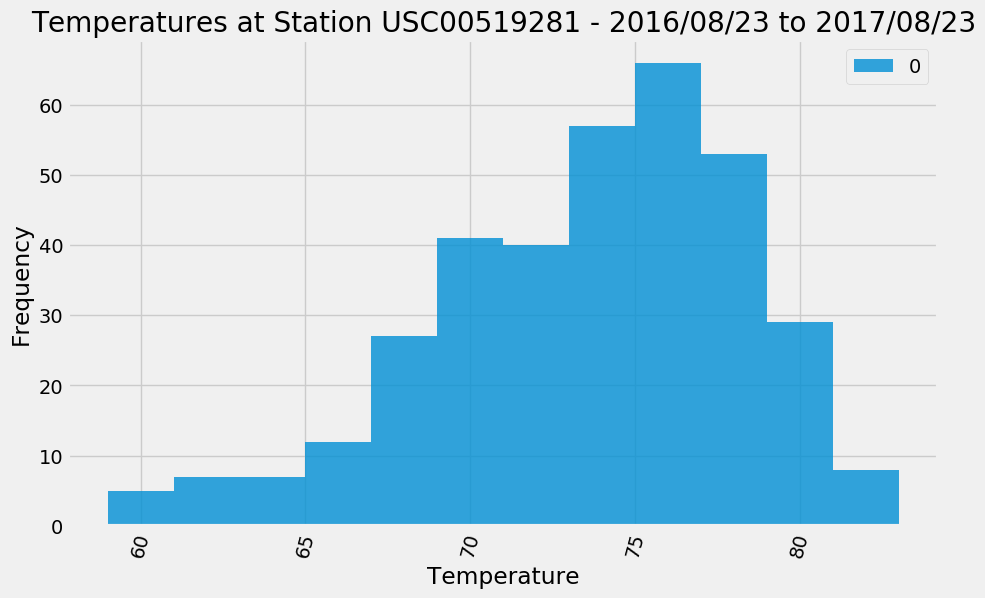

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_station_df = pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.date >= query_date).filter(Measurement.station == 'USC00519281').all())

ax = last_year_station_df.plot.hist(title='Temperatures at Station USC00519281 - 2016/08/23 to 2017/08/23', alpha=0.8, figsize=(10,6),rot=75,bins=12)
ax.set_ylabel('Frequency')
ax.set_xlabel('Temperature')
plt.show()

# Close Session

In [35]:
# Close Session
session.close()